# Data Modeling in R:
- Functions: 
  - lm: simple linear model
  - glm: generalized linear model
  - aov: anova
- Helper functions:
  - coef: extract model coefficients
  - residuals: extract model residuals
  - fitted: returns fitted values
  - confint: confidence interval
- Test functions:
  - t.test: one ot two sample t test (operates on a vector)
  - TukeyHSD: post stock analysis (creates sets of confidence intervals between groups after anova)
  - predict: produces predicted values based on linear model objects

In [1]:
library(dplyr)
library(tibble)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Using the Linear Model with lm() function
- Using built-in dataset trees
- 31 observations on 3 Variables (Girth, Height, Volume)
- Relate the Volume with the Height and the Girth

In [2]:
trees_data <- as.tibble(trees)
head(trees_data)

Girth,Height,Volume
8.3,70,10.3
8.6,65,10.3
8.8,63,10.2
10.5,72,16.4
10.7,81,18.8
10.8,83,19.7


In [3]:
lm1 <- lm(Volume ~ Height + Girth, data = trees_data)
lm1


Call:
lm(formula = Volume ~ Height + Girth, data = trees_data)

Coefficients:
(Intercept)       Height        Girth  
   -57.9877       0.3393       4.7082  


In [4]:
# Extract coefficients
coeffs <- coef(lm1)
coeffs

(Intercept)      Height       Girth 
-57.9876589   0.3392512   4.7081605

In [5]:
# Do a summary to get Residuals, Coefficients, Standard Error, R-squared, Adjusted R-squared, F-statistics and p-value
summary(lm1)


Call:
lm(formula = Volume ~ Height + Girth, data = trees_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Height        0.3393     0.1302   2.607   0.0145 *  
Girth         4.7082     0.2643  17.816  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


### Predict Volume using the Linear Model
- Create new Dataframe with Height and Girth

In [7]:
df <- trees_data %>%
  select(Girth, Height)
head(df) 

Girth,Height
8.3,70
8.6,65
8.8,63
10.5,72
10.7,81
10.8,83


In [9]:
pred <- predict(lm1, df)
head(pred)

1         2         3         4         5         6 
 4.837660  4.553852  4.816981 15.874115 19.869008 21.018327

In [10]:
trees_data <- trees_data %>%
  mutate(Predicted_Volume = pred)

head(trees_data)

Girth,Height,Volume,Predicted_Volume
8.3,70,10.3,4.837660
8.6,65,10.3,4.553852
8.8,63,10.2,4.816981
10.5,72,16.4,15.874115
10.7,81,18.8,19.869008
10.8,83,19.7,21.018327


### Plot Predicted values vs Actual values

In [11]:
cor(trees_data$Volume, trees_data$Predicted_Volume, method="pearson")

[1] 0.9736273

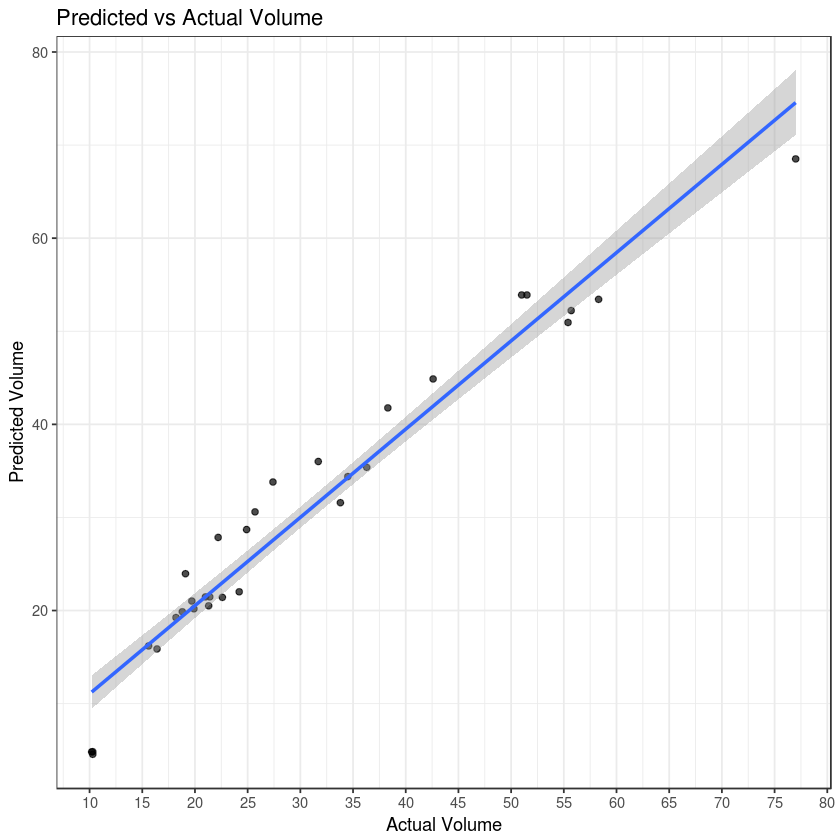

In [12]:
trees_data %>%
  ggplot() +
  geom_point(aes(x = Volume, y = Predicted_Volume), alpha = 0.7) +
  theme_bw() +
  ggtitle("Predicted vs Actual Volume") +
  scale_x_continuous(name= "Actual Volume", breaks = 5*c(0:18)) +
  scale_y_continuous(name = "Predicted Volume") +
  geom_smooth(aes(x = Volume, y = Predicted_Volume), method = 'lm', level = 0.90)

<hr>

## Example using built-in dataset "faithful"

In [13]:
data <- as.tibble(faithful)
head(data)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


In [14]:
lm1 <- lm(eruptions ~ waiting, data = data)
lm1


Call:
lm(formula = eruptions ~ waiting, data = data)

Coefficients:
(Intercept)      waiting  
   -1.87402      0.07563  


In [15]:
# Extract coefficients
coeffs <- coef(lm1)
coeffs

(Intercept)     waiting 
-1.87401599  0.07562795

In [18]:
# Create new dataframe to use to predict
df <- data %>%
  select(waiting)
head(df) 

waiting
79
54
74
62
85
55


In [19]:
pred <- predict(lm1, df)

data <- data %>%
  mutate(Predicted_Eruptions = pred)

head(data)

eruptions,waiting,Predicted_Eruptions
3.600,79,4.100592
1.800,54,2.209893
3.333,74,3.722452
2.283,62,2.814917
4.533,85,4.554360
2.883,55,2.285521


### Plot Predicted values vs Actual values

In [20]:
cor(data$eruptions, data$Predicted_Eruptions, method="pearson")

[1] 0.9008112

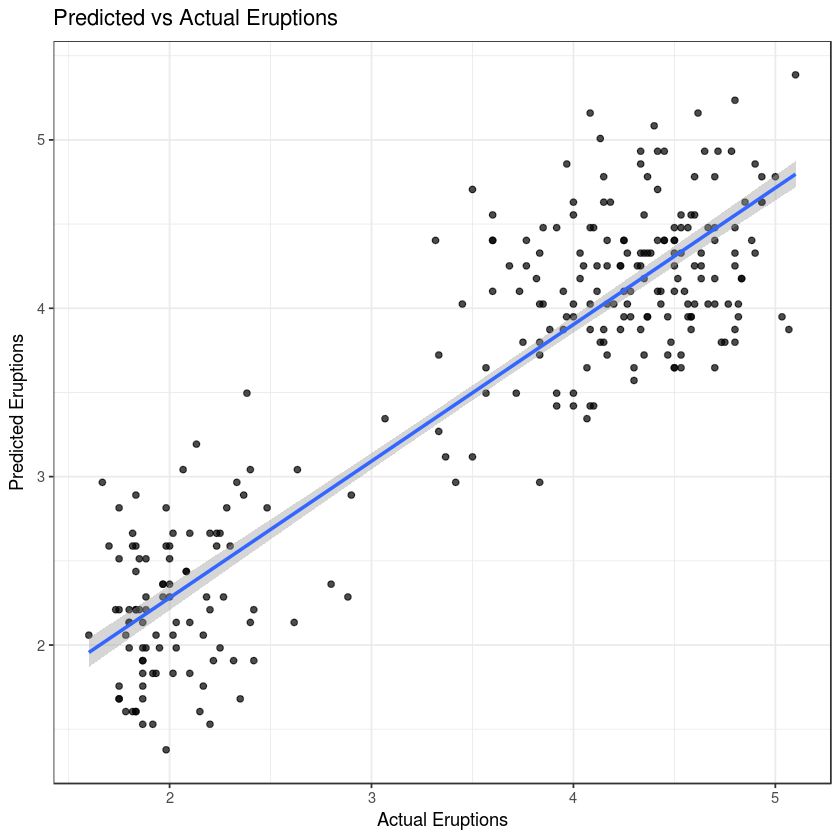

In [21]:
data %>%
  ggplot() +
  geom_point(aes(x = eruptions, y = Predicted_Eruptions), alpha = 0.7) +
  theme_bw() +
  ggtitle("Predicted vs Actual Eruptions") +
  scale_x_continuous(name= "Actual Eruptions") +
  scale_y_continuous(name = "Predicted Eruptions") +
  geom_smooth(aes(x = eruptions, y = Predicted_Eruptions), method = 'lm', level = 0.90)